In [35]:
from tfgen.models.mnist_cnn import *
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def transform(x):
    return x / 255.0

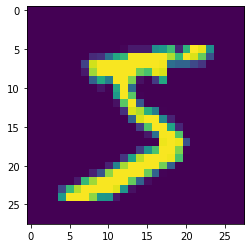

In [3]:
plt.imshow(transform(x_train[0]))

In [4]:
cnn = MNIST_CNN()
inp, label, out, train, loss, output_names, acc, acc_update, saver = cnn.model()
use_checkpoint = True

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(tf.local_variables_initializer())

if use_checkpoint:
    saver.restore(sess, 'ckpt')

In [14]:
y = sess.run(cnn.conv1, feed_dict={inp: [transform(x_train[0])]})

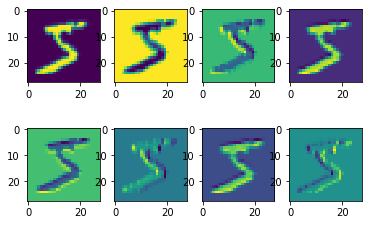

In [26]:
output = np.transpose(y[0], [2, 0, 1])
_, axes = plt.subplots(2, 4)
_ = [axes[i//4][i%4].imshow(output[i]) for i in range(8)]

In [27]:
np.set_printoptions(threshold=np.inf)
output

array([[[ 1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02],
        [ 1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.4

In [44]:
json.dumps(transform(x_train[0].reshape([1, 28, 28])).tolist())

'[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0, 0.9686274509803922, 0.498039215686

In [10]:
num_batches = 10
batch_size = 25

for i in range(num_batches):
    x_batch, y_batch = cnn.batch(batch_size)
    x_batch = x_batch.astype(np.float32)
    x_batch /= 255.0

    _, loss_batch, acc_result, _ = sess.run([train, loss, acc, acc_update], feed_dict={
        inp: x_batch,
        label: y_batch,
    })
    print("\033[K", end='\r')
    print("Batch: %d\tLoss: %.3f\tAccuracy: %.3f" % (i, loss_batch, acc_result), end='\r')

print()

x_test, y_test = cnn.test_data()
x_test = x_test.astype(np.float32)
x_test /= 255.0
acc_inits = [v for v in tf.local_variables() if 'accuracy/' in v.name]
sess.run(tf.variables_initializer(acc_inits))
loss_test, _ = sess.run([loss, acc_update], feed_dict={
    inp: x_test,
    label: y_test,
})
acc_result = sess.run(acc)
print("Batch: TEST\tLoss: %.3f\tAccuracy: %.3f" % (loss_test, acc_result))

ckpt, meta_graph = save_checkpoint(sess)
graph_def = save_graph(sess)
output_graph = here("frozen.pb")

freeze_graph(graph_def, ckpt, meta_graph, output_names, output_graph)

Batch: 999	Loss: 0.001	Accuracy: 0.972
Batch: TEST	Loss: 8.377	Accuracy: 0.228
INFO:tensorflow:Restoring parameters from ./ckpt
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


In [11]:
[n.name for n in sess.graph.get_operations()]

['Placeholder',
 'Placeholder_1',
 'one_hot/on_value',
 'one_hot/off_value',
 'one_hot/depth',
 'one_hot',
 'Reshape/shape',
 'Reshape',
 'conv2d/kernel/Initializer/random_uniform/shape',
 'conv2d/kernel/Initializer/random_uniform/min',
 'conv2d/kernel/Initializer/random_uniform/max',
 'conv2d/kernel/Initializer/random_uniform/RandomUniform',
 'conv2d/kernel/Initializer/random_uniform/sub',
 'conv2d/kernel/Initializer/random_uniform/mul',
 'conv2d/kernel/Initializer/random_uniform',
 'conv2d/kernel',
 'conv2d/kernel/Assign',
 'conv2d/kernel/read',
 'conv2d/bias/Initializer/zeros',
 'conv2d/bias',
 'conv2d/bias/Assign',
 'conv2d/bias/read',
 'conv2d/dilation_rate',
 'conv2d/Conv2D',
 'conv2d/BiasAdd',
 'max_pooling2d/MaxPool',
 'conv2d_1/kernel/Initializer/random_uniform/shape',
 'conv2d_1/kernel/Initializer/random_uniform/min',
 'conv2d_1/kernel/Initializer/random_uniform/max',
 'conv2d_1/kernel/Initializer/random_uniform/RandomUniform',
 'conv2d_1/kernel/Initializer/random_uniform/sub

In [28]:
conv_weights = sess.graph.get_tensor_by_name('conv2d/kernel:0')
print(conv_weights.shape)
conv_weights_data = sess.run(tf.transpose(conv_weights, [3, 2, 0, 1]))

(2, 2, 1, 8)


In [68]:
conv_bias = sess.graph.get_tensor_by_name('conv2d/bias:0')
print(conv_bias.shape)
conv_bias_data = sess.run(conv_bias)
conv_bias_data

(8,)


array([ 0.01412213,  0.00319249,  0.03526219, -0.0250259 ,  0.01720713,
       -0.02350969, -0.01498715, -0.03261873], dtype=float32)

In [29]:
conv_weights_data

array([[[[ 0.02887894,  0.2780876 ],
         [ 0.00834149,  0.0240231 ]]],


       [[[-0.05715154, -0.21760756],
         [-0.35753262, -0.02936244]]],


       [[[-0.05253833,  0.12001714],
         [-0.23218466,  0.0273388 ]]],


       [[[ 0.20287232,  0.3106366 ],
         [-0.01422699, -0.06088253]]],


       [[[ 0.12369522,  0.04495308],
         [-0.34268126, -0.05204086]]],


       [[[-0.17060503,  0.24534401],
         [-0.26286626,  0.2865647 ]]],


       [[[ 0.1994901 ,  0.20455547],
         [-0.04739247, -0.07991572]]],


       [[[ 0.30992737, -0.282874  ],
         [ 0.03559659, -0.07156254]]]], dtype=float32)

In [79]:
# 16.W, 10.BP
# tf2rtl_output = np.array([[[0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.0146484375, 0.0146484375, 0.0146484375, 0.025390625, 0.0302734375, 0.0341796875, 0.021484375, 0.029296875, 0.04296875, 0.0458984375, 0.033203125, 0.017578125, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.015625, 0.017578125, 0.0234375, 0.03125, 0.037109375, 0.0625, 0.06640625, 0.06640625, 0.18359375, 0.2060546875, 0.248046875, 0.0830078125, 0.2265625, 0.3408203125, 0.3388671875, 0.19140625, 0.029296875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.017578125, 0.0693359375, 0.0869140625, 0.150390625, 0.2236328125, 0.248046875, 0.33984375, 0.3486328125, 0.3486328125, 0.3486328125, 0.3486328125, 0.3037109375, 0.2373046875, 0.318359375, 0.3125, 0.2568359375, 0.10546875, 0.0205078125, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.0673828125, 0.298828125, 0.3466796875, 0.3486328125, 0.3486328125, 0.3486328125, 0.3486328125, 0.34375, 0.33984375, 0.3466796875, 0.345703125, 0.150390625, 0.1123046875, 0.111328125, 0.0830078125, 0.0615234375, 0.017578125, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.033203125, 0.2607421875, 0.330078125, 0.33203125, 0.34375, 0.3486328125, 0.3447265625, 0.265625, 0.234375, 0.3076171875, 0.3203125, 0.0458984375, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.1005859375, 0.193359375, 0.1474609375, 0.3154296875, 0.345703125, 0.28125, 0.0517578125, 0.0146484375, 0.060546875, 0.1865234375, 0.03125, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.0283203125, 0.015625, 0.1943359375, 0.333984375, 0.1650390625, 0.029296875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.166015625, 0.322265625, 0.2783203125, 0.05078125, 0.015625, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.025390625, 0.224609375, 0.333984375, 0.1474609375, 0.04296875, 0.0283203125, 0.0166015625, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.0517578125, 0.287109375, 0.310546875, 0.244140625, 0.1796875, 0.044921875, 0.01953125, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.1015625, 0.2880859375, 0.3349609375, 0.3466796875, 0.203125, 0.0751953125, 0.0224609375, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.0625, 0.2216796875, 0.318359375, 0.34375, 0.236328125, 0.0849609375, 0.0224609375, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.0302734375, 0.115234375, 0.3212890625, 0.3486328125, 0.27734375, 0.048828125, 0.015625, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.017578125, 0.0263671875, 0.0341796875, 0.314453125, 0.3486328125, 0.3408203125, 0.1181640625, 0.0205078125, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.0166015625, 0.0283203125, 0.08984375, 0.19140625, 0.2587890625, 0.3408203125, 0.3486328125, 0.2919921875, 0.044921875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.015625, 0.0244140625, 0.080078125, 0.208984375, 0.3115234375, 0.345703125, 0.3486328125, 0.34375, 0.328125, 0.2421875, 0.0341796875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.015625, 0.01953125, 0.060546875, 0.169921875, 0.2978515625, 0.3447265625, 0.3486328125, 0.34375, 0.330078125, 0.2626953125, 0.12109375, 0.0224609375, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.0146484375, 0.029296875, 0.064453125, 0.1171875, 0.283203125, 0.3447265625, 0.3486328125, 0.34375, 0.330078125, 0.259765625, 0.1240234375, 0.0244140625, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.0185546875, 0.0302734375, 0.060546875, 0.232421875, 0.302734375, 0.3447265625, 0.3486328125, 0.34765625, 0.337890625, 0.2587890625, 0.1220703125, 0.0322265625, 0.0146484375, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.0859375, 0.234375, 0.310546875, 0.345703125, 0.3447265625, 0.3369140625, 0.3330078125, 0.3125, 0.185546875, 0.0400390625, 0.0146484375, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.1611328125, 0.3037109375, 0.3173828125, 0.3173828125, 0.2724609375, 0.18359375, 0.171875, 0.044921875, 0.0146484375, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875], [0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875, 0.013671875]], [[0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.001953125, -0.0048828125, -0.025390625, -0.025390625, -0.037109375, -0.189453125, -0.208984375, -0.2470703125, -0.0537109375, -0.259765625, -0.3837890625, -0.3583984375, -0.17578125, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -9.765625E-4, -0.0439453125, -0.0595703125, -0.1474609375, -0.236328125, -0.2822265625, -0.40234375, -0.40234375, -0.4951171875, -0.52734375, -0.560546875, -0.396484375, -0.416015625, -0.63671875, -0.62890625, -0.4443359375, -0.1162109375, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.0029296875, -0.12109375, -0.3984375, -0.4716796875, -0.53515625, -0.5625, -0.6376953125, -0.65625, -0.65625, -0.65625, -0.65625, -0.6103515625, -0.3369140625, -0.3779296875, -0.3837890625, -0.3037109375, -0.15234375, -0.01171875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.0419921875, -0.263671875, -0.60546875, -0.65625, -0.65625, -0.65625, -0.65625, -0.650390625, -0.5712890625, -0.556640625, -0.64453125, -0.47265625, -0.0888671875, -0.0859375, -0.0634765625, -0.0439453125, -0.0068359375, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.0126953125, -0.19921875, -0.39453125, -0.5029296875, -0.451171875, -0.65625, -0.6513671875, -0.5146484375, -0.2138671875, -0.2568359375, -0.3388671875, -0.267578125, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.0654296875, -0.1513671875, -0.146484375, -0.2587890625, -0.5166015625, -0.5966796875, -0.1806640625, 0.0, -0.0341796875, -0.138671875, -0.0322265625, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.009765625, -0.001953125, -0.146484375, -0.4736328125, -0.509765625, -0.28515625, 0.0, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.1181640625, -0.2841796875, -0.513671875, -0.40625, -0.0966796875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.0068359375, -0.16796875, -0.3349609375, -0.4794921875, -0.3486328125, -0.234375, -0.150390625, 9.765625E-4, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.02734375, -0.2216796875, -0.38671875, -0.552734375, -0.51171875, -0.3935546875, -0.16796875, -0.0322265625, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.06640625, -0.2265625, -0.353515625, -0.5615234375, -0.5419921875, -0.4189453125, -0.2177734375, -0.03515625, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.0361328125, -0.1689453125, -0.2900390625, -0.431640625, -0.56640625, -0.4326171875, -0.2666015625, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.0107421875, -0.0810546875, -0.263671875, -0.650390625, -0.599609375, -0.3974609375, -0.0869140625, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.0029296875, -0.078125, -0.201171875, -0.49609375, -0.6552734375, -0.6474609375, -0.400390625, -0.0146484375, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, -0.001953125, -0.0703125, -0.271484375, -0.4697265625, -0.5693359375, -0.640625, -0.65625, -0.603515625, -0.3017578125, 0.001953125, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0, -0.044921875, -0.216796875, -0.4736328125, -0.6123046875, -0.6513671875, -0.65625, -0.650390625, -0.560546875, -0.3193359375, -0.0390625, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0, -0.037109375, -0.1357421875, -0.4287109375, -0.59765625, -0.6494140625, -0.65625, -0.650390625, -0.5595703125, -0.341796875, -0.11328125, -0.015625, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0, -0.04296875, -0.283203125, -0.396484375, -0.580078125, -0.6474609375, -0.65625, -0.6494140625, -0.5546875, -0.3388671875, -0.1240234375, -0.017578125, 0.001953125, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, -0.00390625, -0.0947265625, -0.2802734375, -0.4951171875, -0.6083984375, -0.6484375, -0.65625, -0.6552734375, -0.6298828125, -0.41015625, -0.1259765625, -0.0234375, 0.0, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, -0.060546875, -0.3779296875, -0.6142578125, -0.650390625, -0.6513671875, -0.5849609375, -0.4765625, -0.451171875, -0.189453125, -0.037109375, 0.0, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, -0.11328125, -0.2451171875, -0.271484375, -0.271484375, -0.236328125, -0.162109375, -0.1416015625, -0.041015625, -9.765625E-4, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875], [0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875, 0.0029296875]], [[0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.033203125, 0.01953125, 0.01953125, 0.03125, -0.06640625, -0.0703125, -0.123046875, 0.0283203125, -0.08984375, -0.1708984375, -0.177734375, -0.0810546875, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.0380859375, 0.0107421875, 0.01171875, -0.03515625, -0.0869140625, -0.0869140625, -0.166015625, -0.166015625, -0.115234375, -0.1328125, -0.119140625, -0.1787109375, -0.0234375, -0.0859375, -0.1015625, -0.1279296875, -0.0498046875, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.0400390625, 0.029296875, -0.146484375, -0.1337890625, -0.1171875, -0.1220703125, -0.0869140625, -0.103515625, -0.103515625, -0.103515625, -0.103515625, -0.1318359375, -0.0078125, 0.05078125, 0.0263671875, 0.0283203125, -0.0126953125, 0.021484375, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.05859375, 0.142578125, -0.0693359375, -0.103515625, -0.103515625, -0.103515625, -0.103515625, -0.109375, -0.060546875, -0.0380859375, -0.099609375, -0.1943359375, 0.0537109375, 0.0556640625, 0.0439453125, 0.041015625, 0.0263671875, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.04296875, 0.1416015625, 0.0517578125, -0.0302734375, 0.0302734375, -0.103515625, -0.1083984375, -0.111328125, 0.068359375, 0.1171875, 0.072265625, -0.15625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.072265625, 0.0927734375, 0.0380859375, 0.146484375, -0.0126953125, -0.14453125, -0.0849609375, 0.0322265625, 0.0546875, 0.09765625, 0.0029296875, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.041015625, 0.0322265625, 0.12109375, 0.021484375, -0.1875, -0.158203125, 0.033203125, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.1015625, 0.1337890625, -0.076171875, -0.2294921875, -0.0302734375, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.0400390625, 0.1240234375, 0.107421875, -0.181640625, -0.1689453125, -0.1005859375, -0.0634765625, 0.0341796875, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.05078125, 0.1484375, 0.041015625, -0.1298828125, -0.15234375, -0.2060546875, -0.0732421875, 0.01171875, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.0732421875, 0.1337890625, 0.08203125, -0.0419921875, -0.1669921875, -0.1943359375, -0.10546875, 0.009765625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.0556640625, 0.11328125, 0.1103515625, 0.04296875, -0.1513671875, -0.1962890625, -0.1416015625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.0419921875, 0.07421875, 0.16015625, -0.099609375, -0.134765625, -0.224609375, -0.0234375, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.0400390625, 0.0068359375, -0.064453125, 0.01171875, -0.1025390625, -0.1103515625, -0.1767578125, 0.01953125, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.0390625, 0.0146484375, -0.0546875, -0.0966796875, -0.111328125, -0.0888671875, -0.103515625, -0.130859375, -0.173828125, 0.0341796875, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.037109375, 0.0244140625, -0.0283203125, -0.080078125, -0.09375, -0.0986328125, -0.103515625, -0.1083984375, -0.076171875, -0.0029296875, -0.0029296875, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.037109375, 0.0205078125, 0.0078125, -0.0849609375, -0.0908203125, -0.0966796875, -0.103515625, -0.109375, -0.0712890625, 0.001953125, 0.02734375, 0.0185546875, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.0361328125, 0.0361328125, -0.0869140625, -0.11328125, -0.083984375, -0.095703125, -0.103515625, -0.109375, -0.068359375, 0.001953125, 0.0234375, 0.017578125, 0.0341796875, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.041015625, 0.001953125, -0.0908203125, -0.0693359375, -0.103515625, -0.0966796875, -0.103515625, -0.1044921875, -0.107421875, -0.046875, 0.0205078125, 0.0224609375, 0.033203125, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.07421875, 0.0068359375, -0.099609375, -0.09765625, -0.107421875, -0.078125, -0.0078125, -0.0234375, 0.0322265625, 0.01171875, 0.0322265625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.0986328125, 0.1259765625, 0.1015625, 0.1015625, 0.08203125, 0.0546875, 0.068359375, 0.0146484375, 0.03125, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625], [0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625, 0.03515625]], [[-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.0263671875, -0.03125, -0.0322265625, -0.0322265625, -0.0576171875, -0.06640625, -0.0751953125, -0.04296875, -0.0673828125, -0.095703125, -0.099609375, -0.0703125, -0.033203125, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.033203125, -0.0361328125, -0.05078125, -0.068359375, -0.0732421875, -0.0732421875, -0.0654296875, -0.0654296875, 0.06640625, 0.1640625, 0.2265625, 0.08984375, 0.1259765625, 0.3447265625, 0.4169921875, 0.2978515625, 0.0712890625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.037109375, -0.048828125, -0.033203125, 0.0419921875, 0.16015625, 0.228515625, 0.341796875, 0.408203125, 0.408203125, 0.408203125, 0.408203125, 0.412109375, 0.3369140625, 0.39453125, 0.451171875, 0.390625, 0.2041015625, 0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, 0.029296875, 0.248046875, 0.3984375, 0.408203125, 0.408203125, 0.408203125, 0.408203125, 0.4208984375, 0.427734375, 0.4130859375, 0.4091796875, 0.271484375, 0.1474609375, 0.138671875, 0.1064453125, 0.0654296875, 0.0048828125, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.00390625, 0.234375, 0.4140625, 0.447265625, 0.416015625, 0.408203125, 0.419921875, 0.400390625, 0.3525390625, 0.4091796875, 0.423828125, 0.15625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, 0.0712890625, 0.2236328125, 0.2265625, 0.3291015625, 0.4130859375, 0.388671875, 0.14453125, -0.017578125, 0.0263671875, 0.1953125, 0.0966796875, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.0087890625, -0.013671875, 0.1279296875, 0.3349609375, 0.224609375, 0.033203125, -0.0263671875, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, 0.140625, 0.345703125, 0.333984375, 0.0947265625, -0.029296875, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.0126953125, 0.2041015625, 0.3720703125, 0.1923828125, -0.021484375, -0.0615234375, -0.033203125, -0.0263671875, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, 0.0166015625, 0.275390625, 0.376953125, 0.2724609375, 0.1572265625, 0.0185546875, -0.0400390625, -0.02734375, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, 0.072265625, 0.3203125, 0.4248046875, 0.412109375, 0.2451171875, 0.048828125, -0.021484375, -0.02734375, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, 0.029296875, 0.2314453125, 0.40625, 0.4169921875, 0.2822265625, 0.06640625, -0.0166015625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.0068359375, 0.099609375, 0.294921875, 0.4072265625, 0.3291015625, 0.0927734375, -0.029296875, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.037109375, -0.0595703125, -0.0771484375, 0.2060546875, 0.4052734375, 0.4140625, 0.236328125, 0.0244140625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.03515625, -0.0634765625, -0.033203125, 0.0947265625, 0.2255859375, 0.3525390625, 0.4091796875, 0.369140625, 0.1298828125, -0.0244140625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.03125, -0.0546875, -0.0380859375, 0.111328125, 0.294921875, 0.388671875, 0.408203125, 0.4208984375, 0.44921875, 0.3896484375, 0.119140625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.03125, -0.0439453125, -0.0517578125, 0.05859375, 0.2587890625, 0.3828125, 0.408203125, 0.4208984375, 0.4521484375, 0.4140625, 0.2275390625, 0.0361328125, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.0302734375, -0.068359375, -0.0615234375, -9.765625E-4, 0.2099609375, 0.3759765625, 0.408203125, 0.421875, 0.4521484375, 0.408203125, 0.228515625, 0.041015625, -0.0244140625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.0390625, -0.0703125, -0.068359375, 0.1220703125, 0.30078125, 0.380859375, 0.408203125, 0.41015625, 0.4365234375, 0.40234375, 0.2255859375, 0.048828125, -0.0185546875, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, 0.0078125, 0.158203125, 0.310546875, 0.38671875, 0.41796875, 0.4384765625, 0.443359375, 0.4609375, 0.3291015625, 0.0927734375, -0.017578125, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, 0.1396484375, 0.3896484375, 0.4833984375, 0.4833984375, 0.43359375, 0.306640625, 0.2421875, 0.09765625, -0.0126953125, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625], [-0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625, -0.025390625]], [[0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0166015625, 0.0087890625, -0.0107421875, -0.0107421875, -0.033203125, -0.1806640625, -0.2021484375, -0.2236328125, -0.0517578125, -0.2578125, -0.3759765625, -0.341796875, -0.1533203125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0107421875, -0.03125, -0.05078125, -0.140625, -0.224609375, -0.259765625, -0.3642578125, -0.3642578125, -0.345703125, -0.291015625, -0.2734375, -0.2314453125, -0.2255859375, -0.248046875, -0.181640625, -0.1171875, -0.0078125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0068359375, -0.0927734375, -0.3349609375, -0.3427734375, -0.3037109375, -0.271484375, -0.2490234375, -0.2080078125, -0.2080078125, -0.2080078125, -0.2080078125, -0.177734375, 0.0146484375, 0.0166015625, 0.060546875, 0.083984375, 0.0703125, 0.0478515625, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.021484375, 0.0126953125, -0.169921875, -0.2080078125, -0.2080078125, -0.2080078125, -0.2080078125, -0.197265625, -0.119140625, -0.111328125, -0.1982421875, -0.1689453125, 0.076171875, 0.0703125, 0.06640625, 0.05078125, 0.0361328125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0205078125, 0.046875, 0.02734375, -0.0478515625, -0.01171875, -0.2080078125, -0.1982421875, -0.1044921875, 0.12890625, 0.1396484375, 0.08984375, -0.072265625, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.03125, 0.080078125, 0.0908203125, 0.080078125, -0.07421875, -0.18359375, -0.0029296875, 0.0224609375, 0.0244140625, 0.064453125, 0.091796875, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.01953125, 0.0234375, 0.015625, -0.103515625, -0.2236328125, -0.1962890625, 0.0146484375, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0390625, 0.07421875, -0.1337890625, -0.24609375, -0.0771484375, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0185546875, 0.0478515625, 0.0556640625, -0.2177734375, -0.28515625, -0.220703125, -0.12890625, 0.015625, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0234375, 0.0595703125, 0.015625, -0.220703125, -0.279296875, -0.2958984375, -0.1484375, -0.0166015625, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.03125, 0.0888671875, 0.078125, -0.1181640625, -0.2314453125, -0.29296875, -0.1787109375, -0.01953125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.025390625, 0.0673828125, 0.1103515625, 0.0078125, -0.2236328125, -0.28515625, -0.2216796875, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.01953125, 0.0400390625, 0.0556640625, -0.203125, -0.21875, -0.240234375, -0.0693359375, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0078125, -0.072265625, -0.1953125, -0.2373046875, -0.2099609375, -0.2001953125, -0.1298828125, 0.044921875, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0087890625, -0.0654296875, -0.220703125, -0.298828125, -0.2802734375, -0.2421875, -0.20703125, -0.197265625, -0.126953125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0126953125, -0.0380859375, -0.173828125, -0.2880859375, -0.263671875, -0.2197265625, -0.2080078125, -0.197265625, -0.1025390625, 0.064453125, 0.10546875, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.0126953125, -0.02734375, -0.111328125, -0.291015625, -0.2822265625, -0.2236328125, -0.2080078125, -0.197265625, -0.0986328125, 0.0654296875, 0.1259765625, 0.0546875, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.013671875, -0.0419921875, -0.25390625, -0.3076171875, -0.306640625, -0.2275390625, -0.2080078125, -0.1962890625, -0.0947265625, 0.064453125, 0.1142578125, 0.056640625, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.005859375, -0.091796875, -0.2568359375, -0.3017578125, -0.25390625, -0.224609375, -0.2080078125, -0.2060546875, -0.1708984375, -0.0078125, 0.1103515625, 0.056640625, 0.021484375, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, -0.001953125, -0.1611328125, -0.2529296875, -0.2216796875, -0.2001953125, -0.12890625, -0.0244140625, 0.001953125, 0.13671875, 0.0830078125, 0.0224609375, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.041015625, 0.126953125, 0.1845703125, 0.1845703125, 0.177734375, 0.1435546875, 0.10546875, 0.0830078125, 0.0244140625, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125], [0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125, 0.017578125]], [[-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0205078125, -0.0078125, -0.0224609375, -0.0224609375, 0.0986328125, -9.765625E-4, 0.0322265625, -0.17578125, 0.134765625, 0.0908203125, -0.009765625, -0.13671875, -0.154296875, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.009765625, -0.0146484375, 0.04296875, 0.05078125, 0.009765625, 0.09765625, 0.0029296875, 0.0029296875, 0.107421875, 0.0439453125, 0.0439453125, -0.1572265625, 0.2236328125, 0.12109375, 0.01171875, -0.197265625, -0.17578125, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.03125, 0.220703125, 0.02734375, 0.064453125, 0.0830078125, 0.05859375, 0.1279296875, 0.072265625, 0.072265625, 0.072265625, 0.0703125, -0.1328125, -0.013671875, 0.1103515625, 0.0166015625, -0.015625, -0.134765625, -0.06640625, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.04296875, 0.3984375, 0.1171875, 0.072265625, 0.072265625, 0.072265625, 0.072265625, 0.0107421875, 0.0498046875, 0.1376953125, 0.0625, -0.3525390625, -0.0078125, -9.765625E-4, -0.025390625, -0.0244140625, -0.0498046875, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0068359375, 0.2626953125, 0.1640625, 0.0087890625, 0.22265625, 0.072265625, 0.0185546875, -0.2041015625, 0.0068359375, 0.1396484375, 0.1689453125, -0.3447265625, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.052734375, 0.087890625, -0.0390625, 0.3173828125, 0.173828125, -0.1572265625, -0.244140625, -0.03125, 0.017578125, 0.0947265625, -0.126953125, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0107421875, -0.033203125, 0.2783203125, 0.255859375, -0.1552734375, -0.2783203125, -0.0263671875, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.12109375, 0.3271484375, 0.076171875, -0.3330078125, -0.09765625, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.013671875, 0.1904296875, 0.32421875, -0.1240234375, -0.125, -0.0673828125, -0.134765625, -0.025390625, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.009765625, 0.2734375, 0.21484375, 0.013671875, -0.0048828125, -0.224609375, -0.1201171875, -0.0498046875, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.0537109375, 0.2021484375, 0.2197265625, 0.140625, -0.056640625, -0.1728515625, -0.1669921875, -0.0517578125, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.01953125, 0.142578125, 0.181640625, 0.236328125, -0.0263671875, -0.150390625, -0.2353515625, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0087890625, 0.0546875, 0.435546875, 0.0771484375, 0.0048828125, -0.3349609375, -0.08984375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.02734375, 0.07421875, 0.046875, 0.3095703125, 0.0751953125, 0.0166015625, -0.341796875, -0.0693359375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.01953125, 0.1005859375, 0.1240234375, 0.1162109375, 0.0869140625, 0.119140625, 0.0693359375, -0.048828125, -0.3505859375, -0.025390625, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.0029296875, 0.0791015625, 0.142578125, 0.146484375, 0.119140625, 0.087890625, 0.072265625, 0.013671875, -0.0732421875, -0.09765625, -0.1455078125, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, 0.001953125, 0.025390625, 0.1689453125, 0.1328125, 0.1337890625, 0.09375, 0.072265625, 0.0107421875, -0.064453125, -0.0830078125, -0.0869140625, -0.076171875, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.00390625, 0.1494140625, 0.06640625, 0.0810546875, 0.158203125, 0.0986328125, 0.072265625, 0.0078125, -0.0625, -0.0771484375, -0.0888671875, -0.0771484375, -0.025390625, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, 0.0380859375, 0.111328125, 0.068359375, 0.177734375, 0.09375, 0.0947265625, 0.072265625, 0.0625, -0.0537109375, -0.1328125, -0.08984375, -0.0693359375, -0.0302734375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, 0.181640625, 0.2470703125, 0.099609375, 0.08984375, 0.0263671875, -0.017578125, 0.0576171875, -0.078125, -0.0771484375, -0.103515625, -0.03125, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, 0.1064453125, 0.1279296875, 0.0498046875, 0.0498046875, 0.009765625, -0.037109375, 0.01171875, -0.09765625, -0.0341796875, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375], [-0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375, -0.0234375]], [[-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.015625, -0.021484375, -0.0244140625, -0.0244140625, -0.05859375, -0.08203125, -0.0966796875, -0.056640625, -0.072265625, -0.1259765625, -0.140625, -0.1015625, -0.0390625, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0244140625, -0.0322265625, -0.0517578125, -0.08203125, -0.095703125, -0.111328125, -0.115234375, -0.115234375, -0.0283203125, 0.0634765625, 0.111328125, 0.044921875, 0.0244140625, 0.1943359375, 0.2744140625, 0.2216796875, 0.0712890625, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0302734375, -0.076171875, -0.0888671875, -0.041015625, 0.0537109375, 0.11328125, 0.1923828125, 0.2568359375, 0.2568359375, 0.2568359375, 0.2578125, 0.28515625, 0.2548828125, 0.279296875, 0.341796875, 0.3056640625, 0.1796875, 0.03515625, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, 0.0185546875, 0.140625, 0.2509765625, 0.2568359375, 0.2568359375, 0.2568359375, 0.2568359375, 0.2744140625, 0.2890625, 0.2724609375, 0.259765625, 0.208984375, 0.123046875, 0.1142578125, 0.0927734375, 0.0595703125, 0.015625, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -9.765625E-4, 0.1484375, 0.29296875, 0.3212890625, 0.2841796875, 0.2568359375, 0.2724609375, 0.2978515625, 0.2822265625, 0.310546875, 0.3125, 0.1435546875, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, 0.048828125, 0.166015625, 0.1875, 0.220703125, 0.275390625, 0.26953125, 0.134765625, -0.0068359375, 0.01953125, 0.1416015625, 0.10546875, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.00390625, -0.00390625, 0.064453125, 0.201171875, 0.1455078125, 0.017578125, -0.015625, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, 0.091796875, 0.232421875, 0.2177734375, 0.064453125, -0.02734375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0068359375, 0.1328125, 0.2529296875, 0.12109375, -0.0546875, -0.0791015625, -0.0361328125, -0.015625, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, 0.0126953125, 0.1787109375, 0.2607421875, 0.1630859375, 0.068359375, -0.0166015625, -0.0458984375, -0.01953125, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, 0.0498046875, 0.224609375, 0.3076171875, 0.26953125, 0.1494140625, 0.001953125, -0.033203125, -0.0205078125, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, 0.0205078125, 0.1630859375, 0.298828125, 0.287109375, 0.173828125, 0.015625, -0.029296875, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.001953125, 0.0712890625, 0.1796875, 0.2568359375, 0.205078125, 0.0634765625, -0.02734375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.029296875, -0.064453125, -0.0966796875, 0.0693359375, 0.25390625, 0.2685546875, 0.1904296875, 0.0341796875, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.02734375, -0.0693359375, -0.0791015625, 0.0, 0.1044921875, 0.2021484375, 0.2578125, 0.2421875, 0.11328125, -0.013671875, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0224609375, -0.0556640625, -0.0751953125, 0.01171875, 0.1552734375, 0.23828125, 0.2568359375, 0.2734375, 0.318359375, 0.3115234375, 0.126953125, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0224609375, -0.041015625, -0.076171875, -0.025390625, 0.123046875, 0.2314453125, 0.2568359375, 0.2744140625, 0.3203125, 0.326171875, 0.2021484375, 0.0458984375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0205078125, -0.0732421875, -0.0986328125, -0.06640625, 0.078125, 0.2255859375, 0.2568359375, 0.275390625, 0.322265625, 0.322265625, 0.2021484375, 0.048828125, -0.013671875, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0322265625, -0.080078125, -0.10546875, 0.0126953125, 0.1650390625, 0.23046875, 0.2568359375, 0.259765625, 0.296875, 0.30859375, 0.197265625, 0.0537109375, -0.0078125, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.013671875, 0.0595703125, 0.171875, 0.2353515625, 0.26953125, 0.3017578125, 0.3173828125, 0.3466796875, 0.27734375, 0.0966796875, -0.0068359375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, 0.09375, 0.29296875, 0.384765625, 0.384765625, 0.3515625, 0.2578125, 0.1953125, 0.1005859375, -0.0029296875, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375], [-0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375, -0.0146484375]], [[-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.033203125, -0.0380859375, -0.0361328125, -0.0361328125, -0.06640625, -0.0537109375, -0.0634765625, -0.0166015625, -0.076171875, -0.0810546875, -0.06640625, -0.03515625, -0.015625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.041015625, -0.0390625, -0.0537109375, -0.0634765625, -0.0634765625, -0.09765625, -0.068359375, -0.068359375, -0.1884765625, -0.068359375, -0.091796875, 0.1318359375, -0.2333984375, -0.1484375, -0.0185546875, 0.1337890625, 0.1298828125, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.046875, -0.126953125, -0.076171875, -0.130859375, -0.1279296875, -0.072265625, -0.14453125, -0.0439453125, -0.0439453125, -0.0439453125, -0.04296875, 0.03125, 0.0380859375, -0.1181640625, -9.765625E-4, 0.0390625, 0.1376953125, 0.044921875, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0927734375, -0.2978515625, -0.0673828125, -0.0439453125, -0.0439453125, -0.0439453125, -0.0439453125, -0.0283203125, -0.0322265625, -0.0517578125, -0.0400390625, 0.2021484375, -0.01171875, -0.025390625, 0.00390625, -0.0087890625, 0.0146484375, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.052734375, -0.2763671875, -0.0810546875, -0.015625, -0.0634765625, -0.0439453125, -0.0302734375, 0.0771484375, 0.005859375, -0.0986328125, -0.0390625, 0.2802734375, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.12109375, -0.11328125, 0.037109375, -0.2275390625, -0.0576171875, 0.0546875, 0.21484375, -0.01953125, -0.080078125, -0.15234375, 0.154296875, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0478515625, -0.017578125, -0.2421875, -0.1796875, 0.154296875, 0.1005859375, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.19140625, -0.1982421875, 0.0166015625, 0.208984375, -0.021484375, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.044921875, -0.2421875, -0.1474609375, 0.166015625, 0.037109375, -0.041015625, -0.0185546875, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0712890625, -0.2822265625, -0.0478515625, 0.0224609375, 0.0048828125, 0.0966796875, -0.0234375, -0.029296875, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.123046875, -0.21484375, -0.0693359375, -0.052734375, 0.1044921875, 0.0751953125, 0.009765625, -0.029296875, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0830078125, -0.189453125, -0.1123046875, -0.0654296875, 0.0703125, 0.1005859375, 0.025390625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.05078125, -0.1171875, -0.2705078125, -0.044921875, 0.0302734375, 0.2099609375, -0.0234375, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0458984375, -0.0634765625, -0.06640625, -0.3564453125, -0.048828125, -0.02734375, 0.2255859375, 0.044921875, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0439453125, -0.0693359375, -0.12890625, -0.1611328125, -0.1162109375, -0.12890625, -0.04296875, 0.0263671875, 0.240234375, -0.0302734375, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0390625, -0.0615234375, -0.123046875, -0.19140625, -0.1455078125, -0.0732421875, -0.0439453125, -0.029296875, 9.765625E-4, 0.078125, 0.1884765625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0390625, -0.0478515625, -0.1103515625, -0.1728515625, -0.177734375, -0.0830078125, -0.0439453125, -0.0283203125, -0.00390625, 0.060546875, 0.1240234375, 0.0615234375, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0380859375, -0.078125, -0.0966796875, -0.12109375, -0.2265625, -0.0927734375, -0.0439453125, -0.02734375, -0.0029296875, 0.0615234375, 0.1181640625, 0.0625, -0.0302734375, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0478515625, -0.07421875, -0.0927734375, -0.2421875, -0.10546875, -0.0849609375, -0.0439453125, -0.041015625, -0.01171875, 0.0712890625, 0.1162109375, 0.0537109375, -0.021484375, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.1318359375, -0.2099609375, -0.11328125, -0.076171875, -0.0322265625, -0.0166015625, -0.025390625, 0.015625, 0.1171875, 0.1162109375, -0.01953125, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.18359375, -0.1484375, -0.0068359375, -0.0068359375, 0.0380859375, 0.07421875, -0.0166015625, 0.109375, -0.013671875, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625], [-0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625, -0.0322265625]]])

# 32.W, 16.BP
tf2rtl_output = np.array([[[0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014404296875, 0.0159149169921875, 0.0164031982421875, 0.0164031982421875, 0.0265655517578125, 0.0310516357421875, 0.0350494384765625, 0.0222930908203125, 0.0305938720703125, 0.0435791015625, 0.0457305908203125, 0.034149169921875, 0.018280029296875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.0169525146484375, 0.01849365234375, 0.0241546630859375, 0.0316925048828125, 0.0384368896484375, 0.0634613037109375, 0.06787109375, 0.06787109375, 0.1856536865234375, 0.20880126953125, 0.24981689453125, 0.085845947265625, 0.2275390625, 0.342071533203125, 0.338653564453125, 0.1929931640625, 0.0305938720703125, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.01873779296875, 0.07086181640625, 0.0883636474609375, 0.152801513671875, 0.22479248046875, 0.249053955078125, 0.3413848876953125, 0.3507843017578125, 0.3507843017578125, 0.3507843017578125, 0.3506011962890625, 0.30511474609375, 0.237945556640625, 0.3199005126953125, 0.3146209716796875, 0.259674072265625, 0.107269287109375, 0.0213775634765625, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.0692596435546875, 0.3004150390625, 0.34796142578125, 0.3507843017578125, 0.3507843017578125, 0.3507843017578125, 0.3507843017578125, 0.345611572265625, 0.3423004150390625, 0.347900390625, 0.3472747802734375, 0.1518402099609375, 0.11407470703125, 0.112823486328125, 0.08447265625, 0.06298828125, 0.0185394287109375, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.03375244140625, 0.26251220703125, 0.332122802734375, 0.3338623046875, 0.34600830078125, 0.3507843017578125, 0.3462677001953125, 0.2664337158203125, 0.2353668212890625, 0.3081512451171875, 0.3208160400390625, 0.0464630126953125, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.1013641357421875, 0.194610595703125, 0.1490325927734375, 0.316680908203125, 0.3475494384765625, 0.2830810546875, 0.052276611328125, 0.0153656005859375, 0.0610198974609375, 0.1869354248046875, 0.0315704345703125, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.029388427734375, 0.01678466796875, 0.19525146484375, 0.335845947265625, 0.167083740234375, 0.0307159423828125, 0.014190673828125, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.1667327880859375, 0.324005126953125, 0.2800140380859375, 0.05267333984375, 0.016632080078125, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.026123046875, 0.225860595703125, 0.33538818359375, 0.148162841796875, 0.044464111328125, 0.0295257568359375, 0.0177459716796875, 0.01416015625, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.0522918701171875, 0.28851318359375, 0.3120269775390625, 0.245758056640625, 0.182098388671875, 0.046905517578125, 0.020477294921875, 0.0149383544921875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.1024627685546875, 0.28924560546875, 0.3361968994140625, 0.3485870361328125, 0.2046356201171875, 0.077239990234375, 0.024383544921875, 0.0149993896484375, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.063201904296875, 0.2235565185546875, 0.32037353515625, 0.345458984375, 0.2384185791015625, 0.08642578125, 0.0233001708984375, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.0315704345703125, 0.117340087890625, 0.322906494140625, 0.3505401611328125, 0.2784271240234375, 0.0494842529296875, 0.0162200927734375, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.0184478759765625, 0.027862548828125, 0.0355987548828125, 0.3154754638671875, 0.3503265380859375, 0.3420867919921875, 0.11907958984375, 0.0214385986328125, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.017791748046875, 0.029327392578125, 0.0906829833984375, 0.192413330078125, 0.2605133056640625, 0.3428497314453125, 0.3505096435546875, 0.2938385009765625, 0.045684814453125, 0.01434326171875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.016387939453125, 0.025634765625, 0.0811920166015625, 0.2109832763671875, 0.3126983642578125, 0.348052978515625, 0.3507843017578125, 0.34588623046875, 0.3293304443359375, 0.2434539794921875, 0.0347442626953125, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.0162811279296875, 0.021087646484375, 0.0625, 0.17193603515625, 0.300140380859375, 0.3471527099609375, 0.3507843017578125, 0.345611572265625, 0.3327789306640625, 0.264801025390625, 0.12200927734375, 0.0229644775390625, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.0158233642578125, 0.0308074951171875, 0.065399169921875, 0.119659423828125, 0.2859649658203125, 0.34625244140625, 0.3507843017578125, 0.3453216552734375, 0.3325958251953125, 0.2621612548828125, 0.1251678466796875, 0.0254669189453125, 0.01434326171875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.0193023681640625, 0.0321044921875, 0.060638427734375, 0.2338409423828125, 0.304412841796875, 0.346923828125, 0.3507843017578125, 0.349945068359375, 0.3391876220703125, 0.26080322265625, 0.1237945556640625, 0.032989501953125, 0.01513671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.0868988037109375, 0.2361907958984375, 0.3121490478515625, 0.34771728515625, 0.346923828125, 0.3383331298828125, 0.3355255126953125, 0.3146820068359375, 0.18731689453125, 0.0411834716796875, 0.0153656005859375, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.162445068359375, 0.3054351806640625, 0.318695068359375, 0.318695068359375, 0.2739715576171875, 0.1853485107421875, 0.173370361328125, 0.0465087890625, 0.01593017578125, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875], [0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875, 0.014129638671875]], [[0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.002838134765625, -0.0030975341796875, -0.0241241455078125, -0.0241241455078125, -0.03656005859375, -0.18914794921875, -0.2076568603515625, -0.2451934814453125, -0.052398681640625, -0.2589263916015625, -0.382781982421875, -0.357757568359375, -0.1748809814453125, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -2.74658203125E-4, -0.04302978515625, -0.0581207275390625, -0.1463470458984375, -0.2348785400390625, -0.2803497314453125, -0.40008544921875, -0.40008544921875, -0.49224853515625, -0.5249786376953125, -0.5572967529296875, -0.393524169921875, -0.4145965576171875, -0.63421630859375, -0.6265106201171875, -0.4413299560546875, -0.115020751953125, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.0024566650390625, -0.1185302734375, -0.3970947265625, -0.468963623046875, -0.533172607421875, -0.560272216796875, -0.6346893310546875, -0.653289794921875, -0.653289794921875, -0.653289794921875, -0.6530609130859375, -0.6081695556640625, -0.3338775634765625, -0.375701904296875, -0.3814544677734375, -0.3004913330078125, -0.1498260498046875, -0.0111541748046875, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.04071044921875, -0.2613677978515625, -0.602264404296875, -0.653289794921875, -0.653289794921875, -0.653289794921875, -0.653289794921875, -0.6469573974609375, -0.5680084228515625, -0.5530548095703125, -0.64178466796875, -0.4703369140625, -0.0876312255859375, -0.085174560546875, -0.06298828125, -0.04266357421875, -0.00555419921875, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.012176513671875, -0.19696044921875, -0.3919525146484375, -0.50048828125, -0.448577880859375, -0.653289794921875, -0.64776611328125, -0.5111846923828125, -0.2119293212890625, -0.2533416748046875, -0.33587646484375, -0.266754150390625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.0650787353515625, -0.1494903564453125, -0.142852783203125, -0.2558441162109375, -0.5144805908203125, -0.59356689453125, -0.1783447265625, 7.171630859375E-4, -0.03350830078125, -0.13787841796875, -0.0313262939453125, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.008758544921875, -8.087158203125E-4, -0.14447021484375, -0.4712677001953125, -0.5069427490234375, -0.28363037109375, 3.814697265625E-4, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.11669921875, -0.28118896484375, -0.5111846923828125, -0.4039154052734375, -0.0954132080078125, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.0062103271484375, -0.16546630859375, -0.3321380615234375, -0.4770660400390625, -0.3464202880859375, -0.23358154296875, -0.1483612060546875, 0.0017852783203125, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.0266876220703125, -0.2196807861328125, -0.3840484619140625, -0.5494232177734375, -0.508697509765625, -0.39031982421875, -0.166778564453125, -0.0318756103515625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.0659332275390625, -0.2249755859375, -0.3510284423828125, -0.5593414306640625, -0.5389404296875, -0.416839599609375, -0.2158660888671875, -0.03466796875, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.03521728515625, -0.16748046875, -0.287567138671875, -0.4288482666015625, -0.5639801025390625, -0.4297332763671875, -0.2650604248046875, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.010467529296875, -0.0797576904296875, -0.261383056640625, -0.6474456787109375, -0.5965118408203125, -0.3952178955078125, -0.0865478515625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.0021209716796875, -0.0762786865234375, -0.200164794921875, -0.495025634765625, -0.6523895263671875, -0.6445770263671875, -0.3977203369140625, -0.0139617919921875, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.001312255859375, -0.06854248046875, -0.26995849609375, -0.4682769775390625, -0.5659942626953125, -0.637603759765625, -0.6529541015625, -0.601654052734375, -0.30010986328125, 0.0027313232421875, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 4.119873046875E-4, -0.043609619140625, -0.21539306640625, -0.470855712890625, -0.6092681884765625, -0.647918701171875, -0.653289794921875, -0.647308349609375, -0.55767822265625, -0.317535400390625, -0.03759765625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 5.340576171875E-4, -0.0366668701171875, -0.1343841552734375, -0.4272613525390625, -0.5948333740234375, -0.6461181640625, -0.653289794921875, -0.6469573974609375, -0.5563812255859375, -0.3388671875, -0.111236572265625, -0.0142974853515625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0011138916015625, -0.041748046875, -0.28143310546875, -0.394500732421875, -0.5772552490234375, -0.6443328857421875, -0.653289794921875, -0.6466217041015625, -0.5520477294921875, -0.335693359375, -0.1229248046875, -0.0166778564453125, 0.0027313232421875, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.003143310546875, -0.0937347412109375, -0.2793731689453125, -0.4927978515625, -0.60589599609375, -0.6456756591796875, -0.653289794921875, -0.6522674560546875, -0.626861572265625, -0.407684326171875, -0.12420654296875, -0.022430419921875, 0.00115966796875, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.059417724609375, -0.3757476806640625, -0.6121063232421875, -0.647247314453125, -0.6485748291015625, -0.58221435546875, -0.473907470703125, -0.44866943359375, -0.1874542236328125, -0.0360260009765625, 7.171630859375E-4, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, -0.1128692626953125, -0.2432098388671875, -0.2694244384765625, -0.2694244384765625, -0.23443603515625, -0.1595458984375, -0.1397247314453125, -0.0400543212890625, -3.96728515625E-4, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625], [0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625, 0.0031890869140625]], [[0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.03558349609375, 0.0344390869140625, 0.020782470703125, 0.020782470703125, 0.0323638916015625, -0.0648956298828125, -0.06982421875, -0.121307373046875, 0.0293731689453125, -0.0885467529296875, -0.170440673828125, -0.176025390625, -0.08038330078125, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0384674072265625, 0.01177978515625, 0.012542724609375, -0.0338134765625, -0.0853424072265625, -0.0845794677734375, -0.163238525390625, -0.163238525390625, -0.1124114990234375, -0.1299591064453125, -0.1166534423828125, -0.1750030517578125, -0.021484375, -0.0833587646484375, -0.1004791259765625, -0.126556396484375, -0.0491790771484375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0405120849609375, 0.0302734375, -0.143585205078125, -0.1311798095703125, -0.114898681640625, -0.119720458984375, -0.083953857421875, -0.101043701171875, -0.101043701171875, -0.101043701171875, -0.10125732421875, -0.1295623779296875, -0.00604248046875, 0.053009033203125, 0.0283660888671875, 0.0303497314453125, -0.0103302001953125, 0.022064208984375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.06024169921875, 0.1442413330078125, -0.0670013427734375, -0.101043701171875, -0.101043701171875, -0.101043701171875, -0.101043701171875, -0.10693359375, -0.058563232421875, -0.03704833984375, -0.097808837890625, -0.1921234130859375, 0.0546875, 0.05694580078125, 0.044708251953125, 0.04205322265625, 0.0272216796875, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.043731689453125, 0.1431732177734375, 0.0530853271484375, -0.02838134765625, 0.031890869140625, -0.101043701171875, -0.1061859130859375, -0.1091766357421875, 0.0700836181640625, 0.1186065673828125, 0.0751495361328125, -0.1546173095703125, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.072906494140625, 0.0936737060546875, 0.0408172607421875, 0.1478729248046875, -0.0109100341796875, -0.14111328125, -0.0837554931640625, 0.032989501953125, 0.0554962158203125, 0.0988616943359375, 0.0035247802734375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.041839599609375, 0.0328216552734375, 0.122406005859375, 0.02313232421875, -0.18450927734375, -0.1560821533203125, 0.0334320068359375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.1018524169921875, 0.1360321044921875, -0.073333740234375, -0.225830078125, -0.028900146484375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.040435791015625, 0.1261444091796875, 0.109130859375, -0.1792449951171875, -0.1668853759765625, -0.0988616943359375, -0.0629730224609375, 0.0343475341796875, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.051727294921875, 0.150146484375, 0.04345703125, -0.1272125244140625, -0.1501312255859375, -0.2041473388671875, -0.0706329345703125, 0.0124969482421875, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0733795166015625, 0.1363372802734375, 0.083831787109375, -0.0400390625, -0.1641082763671875, -0.1917724609375, -0.1035919189453125, 0.0106658935546875, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.056427001953125, 0.1152191162109375, 0.11138916015625, 0.044525146484375, -0.1486053466796875, -0.193267822265625, -0.1405792236328125, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.04278564453125, 0.075714111328125, 0.161376953125, -0.097198486328125, -0.132537841796875, -0.2231292724609375, -0.02301025390625, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.040191650390625, 0.0073089599609375, -0.0634918212890625, 0.0129241943359375, -0.1002197265625, -0.1078643798828125, -0.1741943359375, 0.020233154296875, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0394439697265625, 0.0156097412109375, -0.053314208984375, -0.094451904296875, -0.1086578369140625, -0.0866241455078125, -0.1013641357421875, -0.1275634765625, -0.17218017578125, 0.0348358154296875, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0378265380859375, 0.0256195068359375, -0.0265045166015625, -0.0772552490234375, -0.0907135009765625, -0.096099853515625, -0.101043701171875, -0.1066131591796875, -0.0738677978515625, -0.0016326904296875, -0.0022430419921875, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0377197265625, 0.0213775634765625, 0.00927734375, -0.0828704833984375, -0.0874786376953125, -0.094451904296875, -0.101043701171875, -0.10693359375, -0.06939697265625, 0.004180908203125, 0.028717041015625, 0.0191802978515625, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0371856689453125, 0.0371856689453125, -0.0861358642578125, -0.1107177734375, -0.08135986328125, -0.092803955078125, -0.101043701171875, -0.1072540283203125, -0.0667724609375, 0.004425048828125, 0.0243682861328125, 0.019500732421875, 0.0348358154296875, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0411529541015625, 0.0036163330078125, -0.088653564453125, -0.066650390625, -0.10015869140625, -0.0940399169921875, -0.101043701171875, -0.1020050048828125, -0.105712890625, -0.0450286865234375, 0.022705078125, 0.0229949951171875, 0.0334014892578125, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.075714111328125, 0.008148193359375, -0.097076416015625, -0.095489501953125, -0.105438232421875, -0.0763702392578125, -0.0065765380859375, -0.0205230712890625, 0.0330047607421875, 0.013031005859375, 0.032989501953125, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0992584228515625, 0.1262969970703125, 0.102203369140625, 0.102203369140625, 0.0829010009765625, 0.0550994873046875, 0.0695648193359375, 0.0155792236328125, 0.031951904296875, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375], [0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375, 0.0352630615234375]], [[-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0257415771484375, -0.0294952392578125, -0.03033447265625, -0.03033447265625, -0.056121826171875, -0.064544677734375, -0.0744171142578125, -0.0410003662109375, -0.066131591796875, -0.0951690673828125, -0.0982208251953125, -0.0691375732421875, -0.0321197509765625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.032196044921875, -0.035308837890625, -0.0494842529296875, -0.067047119140625, -0.0705718994140625, -0.07061767578125, -0.0633087158203125, -0.0633087158203125, 0.0682525634765625, 0.166351318359375, 0.2285003662109375, 0.09222412109375, 0.1278533935546875, 0.34576416015625, 0.4186553955078125, 0.29998779296875, 0.0724334716796875, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0367279052734375, -0.048065185546875, -0.0309906005859375, 0.0435791015625, 0.162811279296875, 0.2300567626953125, 0.3438873291015625, 0.409912109375, 0.409912109375, 0.409912109375, 0.4103851318359375, 0.414093017578125, 0.3386993408203125, 0.3958282470703125, 0.4530792236328125, 0.392578125, 0.20587158203125, 0.02587890625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, 0.0303497314453125, 0.2505645751953125, 0.399871826171875, 0.409912109375, 0.409912109375, 0.409912109375, 0.409912109375, 0.42303466796875, 0.429931640625, 0.4152984619140625, 0.410675048828125, 0.2744903564453125, 0.148834228515625, 0.1400909423828125, 0.1084136962890625, 0.0670166015625, 0.0059967041015625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0030975341796875, 0.2369537353515625, 0.415679931640625, 0.450164794921875, 0.4180450439453125, 0.409912109375, 0.4213714599609375, 0.403350830078125, 0.35357666015625, 0.4103851318359375, 0.4258575439453125, 0.158111572265625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, 0.072418212890625, 0.22528076171875, 0.2283782958984375, 0.331451416015625, 0.415435791015625, 0.390350341796875, 0.1464385986328125, -0.0162811279296875, 0.02734375, 0.1967620849609375, 0.0974884033203125, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0079803466796875, -0.0126953125, 0.1301727294921875, 0.3375091552734375, 0.2263946533203125, 0.0354766845703125, -0.025146484375, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, 0.14166259765625, 0.3477630615234375, 0.336669921875, 0.09771728515625, -0.02734375, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.011627197265625, 0.2068023681640625, 0.3748321533203125, 0.1943359375, -0.020111083984375, -0.0597381591796875, -0.0312957763671875, -0.02508544921875, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, 0.017608642578125, 0.27703857421875, 0.378936767578125, 0.275054931640625, 0.1593017578125, 0.019561767578125, -0.0368499755859375, -0.02642822265625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, 0.073638916015625, 0.321014404296875, 0.427154541015625, 0.4136505126953125, 0.246673583984375, 0.050140380859375, -0.0199737548828125, -0.0265350341796875, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, 0.02978515625, 0.2335205078125, 0.40802001953125, 0.4190673828125, 0.28448486328125, 0.0684051513671875, -0.0139923095703125, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0055389404296875, 0.100982666015625, 0.2964630126953125, 0.409332275390625, 0.3304595947265625, 0.09454345703125, -0.028594970703125, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0360107421875, -0.05865478515625, -0.07598876953125, 0.207672119140625, 0.40673828125, 0.416015625, 0.238983154296875, 0.0257568359375, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0343475341796875, -0.0625457763671875, -0.0319366455078125, 0.09674072265625, 0.226776123046875, 0.3542327880859375, 0.4106292724609375, 0.3709869384765625, 0.1319122314453125, -0.0234375, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.03076171875, -0.0535888671875, -0.0366668701171875, 0.1135406494140625, 0.297149658203125, 0.3908233642578125, 0.409912109375, 0.4223175048828125, 0.450927734375, 0.391204833984375, 0.1197662353515625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.030517578125, -0.042083740234375, -0.0503387451171875, 0.060638427734375, 0.260345458984375, 0.38446044921875, 0.409912109375, 0.42303466796875, 0.45404052734375, 0.4160614013671875, 0.229766845703125, 0.037017822265625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.029327392578125, -0.066864013671875, -0.058837890625, 0.00103759765625, 0.2124176025390625, 0.3780975341796875, 0.409912109375, 0.4237518310546875, 0.4544525146484375, 0.4108123779296875, 0.23065185546875, 0.041839599609375, -0.0234375, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0381622314453125, -0.069183349609375, -0.0666656494140625, 0.1245574951171875, 0.303253173828125, 0.38287353515625, 0.409912109375, 0.4120635986328125, 0.439056396484375, 0.4037017822265625, 0.2269134521484375, 0.049560546875, -0.0178680419921875, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, 0.0094757080078125, 0.1602325439453125, 0.3125762939453125, 0.3884429931640625, 0.4196929931640625, 0.44036865234375, 0.44537353515625, 0.4622650146484375, 0.3302001953125, 0.09417724609375, -0.0162811279296875, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, 0.1406402587890625, 0.391357421875, 0.48443603515625, 0.48443603515625, 0.4344940185546875, 0.308074951171875, 0.2431640625, 0.0994720458984375, -0.012298583984375, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625], [-0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625, -0.0250244140625]], [[0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0165863037109375, 0.009490966796875, -0.0106658935546875, -0.0106658935546875, -0.03271484375, -0.1798858642578125, -0.2012786865234375, -0.2232818603515625, -0.0516204833984375, -0.2579193115234375, -0.375885009765625, -0.3406524658203125, -0.1534576416015625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.011077880859375, -0.0304718017578125, -0.0503692626953125, -0.1405487060546875, -0.2239532470703125, -0.25830078125, -0.362548828125, -0.362548828125, -0.343505859375, -0.2893524169921875, -0.27191162109375, -0.2308197021484375, -0.2237396240234375, -0.246734619140625, -0.18060302734375, -0.1157379150390625, -0.0072021484375, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0072021484375, -0.091949462890625, -0.333404541015625, -0.340423583984375, -0.30169677734375, -0.269775390625, -0.2473907470703125, -0.2071380615234375, -0.2071380615234375, -0.2071380615234375, -0.20672607421875, -0.1767120361328125, 0.0149383544921875, 0.018280029296875, 0.0609283447265625, 0.085723876953125, 0.070648193359375, 0.048248291015625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0221710205078125, 0.014007568359375, -0.168731689453125, -0.2071380615234375, -0.2071380615234375, -0.2071380615234375, -0.2071380615234375, -0.1959075927734375, -0.118743896484375, -0.1104888916015625, -0.1969757080078125, -0.168548583984375, 0.0767669677734375, 0.0714263916015625, 0.06683349609375, 0.051239013671875, 0.0361175537109375, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0203704833984375, 0.0482025146484375, 0.028656005859375, -0.0469970703125, -0.0109405517578125, -0.2071380615234375, -0.1973419189453125, -0.102935791015625, 0.1305389404296875, 0.140228271484375, 0.09027099609375, -0.0728759765625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.03131103515625, 0.0806427001953125, 0.09271240234375, 0.080902099609375, -0.0741119384765625, -0.18231201171875, -0.00238037109375, 0.0225372314453125, 0.0247802734375, 0.0652008056640625, 0.0919036865234375, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0196685791015625, 0.024169921875, 0.016448974609375, -0.101959228515625, -0.2230072021484375, -0.1949005126953125, 0.0145111083984375, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0394439697265625, 0.0756378173828125, -0.133575439453125, -0.2445831298828125, -0.075897216796875, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0191497802734375, 0.0488739013671875, 0.057708740234375, -0.217559814453125, -0.28387451171875, -0.2198638916015625, -0.128143310546875, 0.0158538818359375, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.02337646484375, 0.06011962890625, 0.015899658203125, -0.219635009765625, -0.277801513671875, -0.294525146484375, -0.1473541259765625, -0.016387939453125, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0314788818359375, 0.089599609375, 0.079742431640625, -0.1171112060546875, -0.2307586669921875, -0.2913055419921875, -0.1777801513671875, -0.019073486328125, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0251312255859375, 0.0685272216796875, 0.11151123046875, 0.008087158203125, -0.2239532470703125, -0.2834625244140625, -0.22100830078125, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.02001953125, 0.041351318359375, 0.055908203125, -0.2022552490234375, -0.2179412841796875, -0.2397918701171875, -0.0688018798828125, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0078125, -0.0711517333984375, -0.194854736328125, -0.2364959716796875, -0.209075927734375, -0.1984405517578125, -0.12933349609375, 0.0455474853515625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.009246826171875, -0.0654144287109375, -0.2203369140625, -0.2969818115234375, -0.2791290283203125, -0.2410888671875, -0.2065277099609375, -0.19671630859375, -0.126617431640625, 0.0181732177734375, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.012298583984375, -0.0383148193359375, -0.1742401123046875, -0.2864532470703125, -0.262298583984375, -0.218780517578125, -0.2071380615234375, -0.1965179443359375, -0.1020660400390625, 0.0657196044921875, 0.1054840087890625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.01251220703125, -0.0271759033203125, -0.110748291015625, -0.288970947265625, -0.2801971435546875, -0.22265625, -0.2071380615234375, -0.1959075927734375, -0.0981292724609375, 0.0660858154296875, 0.1257476806640625, 0.0550384521484375, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0135345458984375, -0.041900634765625, -0.253265380859375, -0.30596923828125, -0.304901123046875, -0.2265472412109375, -0.2071380615234375, -0.1952972412109375, -0.0938873291015625, 0.065460205078125, 0.11541748046875, 0.0568389892578125, 0.0181732177734375, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0059814453125, -0.0918121337890625, -0.256927490234375, -0.299285888671875, -0.252899169921875, -0.2236328125, -0.2071380615234375, -0.205291748046875, -0.170562744140625, -0.0067138671875, 0.1110992431640625, 0.057586669921875, 0.021575927734375, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, -8.697509765625E-4, -0.16021728515625, -0.251190185546875, -0.2202301025390625, -0.198760986328125, -0.127960205078125, -0.02386474609375, 0.0022430419921875, 0.137481689453125, 0.083648681640625, 0.0225372314453125, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0411834716796875, 0.1277618408203125, 0.18450927734375, 0.18450927734375, 0.1772918701171875, 0.143829345703125, 0.10595703125, 0.08404541015625, 0.02496337890625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625], [0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625, 0.0172119140625]], [[-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0201568603515625, -0.0063934326171875, -0.0218658447265625, -0.0218658447265625, 0.0995025634765625, -5.79833984375E-4, 0.0329437255859375, -0.174713134765625, 0.1362152099609375, 0.0919189453125, -0.008819580078125, -0.1354217529296875, -0.1544342041015625, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.01019287109375, -0.0139923095703125, 0.04498291015625, 0.0526275634765625, 0.01165771484375, 0.100830078125, 0.0052337646484375, 0.0052337646484375, 0.1091461181640625, 0.0465240478515625, 0.0458831787109375, -0.154266357421875, 0.2257843017578125, 0.1219024658203125, 0.01318359375, -0.195709228515625, -0.174468994140625, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.0315399169921875, 0.2222747802734375, 0.0299835205078125, 0.0663299560546875, 0.0852508544921875, 0.0605010986328125, 0.129638671875, 0.0741119384765625, 0.0741119384765625, 0.0741119384765625, 0.071868896484375, -0.13055419921875, -0.0123138427734375, 0.1124114990234375, 0.0184326171875, -0.0117340087890625, -0.13262939453125, -0.06634521484375, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.0438385009765625, 0.40020751953125, 0.11920166015625, 0.0741119384765625, 0.0741119384765625, 0.0741119384765625, 0.0741119384765625, 0.0123138427734375, 0.0510101318359375, 0.1405487060546875, 0.06488037109375, -0.3504180908203125, -0.0068511962890625, 5.035400390625E-4, -0.024505615234375, -0.023468017578125, -0.04962158203125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0062103271484375, 0.2650299072265625, 0.16619873046875, 0.010040283203125, 0.224609375, 0.0741119384765625, 0.020172119140625, -0.2012786865234375, 0.0077667236328125, 0.140655517578125, 0.17181396484375, -0.3435211181640625, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.0534515380859375, 0.088775634765625, -0.0382843017578125, 0.3203125, 0.1761627197265625, -0.1552276611328125, -0.242889404296875, -0.0308837890625, 0.017852783203125, 0.0958709716796875, -0.126556396484375, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0100555419921875, -0.03192138671875, 0.280181884765625, 0.2578582763671875, -0.15350341796875, -0.2773590087890625, -0.0255889892578125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.1225738525390625, 0.3290557861328125, 0.0784454345703125, -0.3308563232421875, -0.097015380859375, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.012939453125, 0.1912384033203125, 0.3274993896484375, -0.121063232421875, -0.1225128173828125, -0.067108154296875, -0.1337432861328125, -0.0245513916015625, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.0101470947265625, 0.2759552001953125, 0.2178955078125, 0.0167694091796875, -0.003173828125, -0.2219085693359375, -0.1187744140625, -0.049285888671875, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.054412841796875, 0.203765869140625, 0.221923828125, 0.1431732177734375, -0.0548095703125, -0.17132568359375, -0.16455078125, -0.051361083984375, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.019775390625, 0.1432952880859375, 0.1834564208984375, 0.2379302978515625, -0.023956298828125, -0.1485748291015625, -0.2343597412109375, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0081329345703125, 0.0552520751953125, 0.4365234375, 0.0789031982421875, 0.006134033203125, -0.333404541015625, -0.0894927978515625, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.028167724609375, 0.0751495361328125, 0.0481109619140625, 0.31170654296875, 0.0767974853515625, 0.0185699462890625, -0.339691162109375, -0.06842041015625, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.0203094482421875, 0.1025848388671875, 0.1255035400390625, 0.1190185546875, 0.0890655517578125, 0.120941162109375, 0.07073974609375, -0.046844482421875, -0.34771728515625, -0.0248565673828125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.003448486328125, 0.079833984375, 0.14483642578125, 0.1492462158203125, 0.12127685546875, 0.090179443359375, 0.0741119384765625, 0.01568603515625, -0.0718231201171875, -0.0960845947265625, -0.145294189453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.0023193359375, 0.0269317626953125, 0.1708831787109375, 0.13482666015625, 0.1363372802734375, 0.09552001953125, 0.0741119384765625, 0.0123138427734375, -0.0624847412109375, -0.0806732177734375, -0.0850372314453125, -0.075714111328125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0032958984375, 0.1500701904296875, 0.06842041015625, 0.0831298828125, 0.1607513427734375, 0.1008758544921875, 0.0741119384765625, 0.008941650390625, -0.060516357421875, -0.074676513671875, -0.0873565673828125, -0.0757904052734375, -0.0248565673828125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.0382843017578125, 0.113067626953125, 0.0704498291015625, 0.1802825927734375, 0.096282958984375, 0.09686279296875, 0.0741119384765625, 0.063995361328125, -0.05145263671875, -0.12994384765625, -0.08837890625, -0.068389892578125, -0.029541015625, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.182220458984375, 0.249267578125, 0.1023406982421875, 0.0921783447265625, 0.028045654296875, -0.0162353515625, 0.0597686767578125, -0.076141357421875, -0.0753021240234375, -0.1019287109375, -0.0308837890625, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, 0.107330322265625, 0.1288909912109375, 0.0506134033203125, 0.0506134033203125, 0.01116943359375, -0.0354766845703125, 0.013153076171875, -0.0964508056640625, -0.0342254638671875, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125], [-0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125, -0.0235137939453125]], [[-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.01593017578125, -0.0211944580078125, -0.02398681640625, -0.02398681640625, -0.057830810546875, -0.0810394287109375, -0.095123291015625, -0.0556640625, -0.0718536376953125, -0.1257476806640625, -0.1397857666015625, -0.1007080078125, -0.0385894775390625, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0243988037109375, -0.0318603515625, -0.0511474609375, -0.080718994140625, -0.0944976806640625, -0.109100341796875, -0.11279296875, -0.11279296875, -0.026153564453125, 0.06634521484375, 0.1142425537109375, 0.047027587890625, 0.027252197265625, 0.1965484619140625, 0.27655029296875, 0.223785400390625, 0.0724639892578125, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0303497314453125, -0.074615478515625, -0.0861663818359375, -0.037750244140625, 0.0557708740234375, 0.11553955078125, 0.19464111328125, 0.2595672607421875, 0.2595672607421875, 0.2595672607421875, 0.26019287109375, 0.2876129150390625, 0.2559967041015625, 0.28155517578125, 0.3442535400390625, 0.30810546875, 0.1816253662109375, 0.0350799560546875, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, 0.0186767578125, 0.14227294921875, 0.254150390625, 0.2595672607421875, 0.2595672607421875, 0.2595672607421875, 0.2595672607421875, 0.27679443359375, 0.2920379638671875, 0.2746429443359375, 0.2628326416015625, 0.2111663818359375, 0.12353515625, 0.11492919921875, 0.094085693359375, 0.0601043701171875, 0.0155181884765625, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -5.4931640625E-4, 0.149688720703125, 0.2955169677734375, 0.323333740234375, 0.2866973876953125, 0.2595672607421875, 0.27459716796875, 0.3002166748046875, 0.2838592529296875, 0.312042236328125, 0.3152923583984375, 0.144927978515625, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, 0.0491790771484375, 0.1683349609375, 0.1899566650390625, 0.2231903076171875, 0.2779693603515625, 0.2721405029296875, 0.1374664306640625, -0.0063934326171875, 0.019500732421875, 0.142181396484375, 0.1054840087890625, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.003753662109375, -0.0032501220703125, 0.065765380859375, 0.2032928466796875, 0.1485443115234375, 0.0194549560546875, -0.0153656005859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, 0.0930633544921875, 0.2350921630859375, 0.220733642578125, 0.0662841796875, -0.0264434814453125, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.00616455078125, 0.135040283203125, 0.254547119140625, 0.123779296875, -0.0522003173828125, -0.0785675048828125, -0.0353851318359375, -0.0151824951171875, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, 0.013092041015625, 0.1803131103515625, 0.263763427734375, 0.16546630859375, 0.07049560546875, -0.0140228271484375, -0.0441741943359375, -0.0196380615234375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, 0.04998779296875, 0.226776123046875, 0.3090362548828125, 0.2720184326171875, 0.1520843505859375, 0.004119873046875, -0.03179931640625, -0.0200042724609375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, 0.0211029052734375, 0.164398193359375, 0.3013458251953125, 0.28961181640625, 0.1771240234375, 0.01837158203125, -0.02862548828125, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0021514892578125, 0.0721282958984375, 0.181884765625, 0.2595367431640625, 0.2078857421875, 0.0649566650390625, -0.026885986328125, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0294036865234375, -0.0642852783203125, -0.0965118408203125, 0.071441650390625, 0.256439208984375, 0.2707672119140625, 0.1920166015625, 0.034698486328125, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0272064208984375, -0.068634033203125, -0.0773773193359375, 0.00341796875, 0.1071929931640625, 0.204803466796875, 0.260498046875, 0.2454681396484375, 0.1147308349609375, -0.013427734375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0225067138671875, -0.0551910400390625, -0.07415771484375, 0.0138702392578125, 0.1581878662109375, 0.24078369140625, 0.2595672607421875, 0.275848388671875, 0.3216705322265625, 0.31207275390625, 0.1273956298828125, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0222015380859375, -0.0399627685546875, -0.07476806640625, -0.023651123046875, 0.125152587890625, 0.234527587890625, 0.2595672607421875, 0.27679443359375, 0.3236846923828125, 0.3284759521484375, 0.204437255859375, 0.0460357666015625, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0206298828125, -0.071929931640625, -0.096954345703125, -0.064056396484375, 0.0811767578125, 0.228271484375, 0.2595672607421875, 0.277740478515625, 0.324554443359375, 0.324066162109375, 0.2032012939453125, 0.0499725341796875, -0.013427734375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0322265625, -0.0791168212890625, -0.103363037109375, 0.01495361328125, 0.16815185546875, 0.23297119140625, 0.2595672607421875, 0.2623748779296875, 0.298828125, 0.3111724853515625, 0.199676513671875, 0.0548095703125, -0.0079498291015625, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.0135040283203125, 0.061431884765625, 0.1745452880859375, 0.2384490966796875, 0.2724151611328125, 0.3041534423828125, 0.3194122314453125, 0.3491058349609375, 0.2796173095703125, 0.0978851318359375, -0.0063934326171875, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, 0.0941009521484375, 0.294342041015625, 0.3858795166015625, 0.3858795166015625, 0.352996826171875, 0.2591552734375, 0.196502685546875, 0.101104736328125, -0.002471923828125, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375], [-0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375, -0.014984130859375]], [[-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.033477783203125, -0.0372772216796875, -0.035186767578125, -0.035186767578125, -0.06549072265625, -0.05322265625, -0.0627593994140625, -0.0155029296875, -0.0756072998046875, -0.081024169921875, -0.06634521484375, -0.0337982177734375, -0.0149078369140625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.041046142578125, -0.0385589599609375, -0.053985595703125, -0.062744140625, -0.06219482421875, -0.09625244140625, -0.066436767578125, -0.066436767578125, -0.1862335205078125, -0.0660858154296875, -0.089324951171875, 0.13433837890625, -0.2321929931640625, -0.1463470458984375, -0.0176544189453125, 0.13592529296875, 0.130645751953125, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.04638671875, -0.1258697509765625, -0.07391357421875, -0.1288604736328125, -0.1249237060546875, -0.0697479248046875, -0.1423797607421875, -0.04150390625, -0.04150390625, -0.04150390625, -0.0409393310546875, 0.0341796875, 0.0399627685546875, -0.115814208984375, 0.00213623046875, 0.042022705078125, 0.1388092041015625, 0.0451507568359375, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.0920562744140625, -0.2960662841796875, -0.064483642578125, -0.04150390625, -0.04150390625, -0.04150390625, -0.04150390625, -0.02606201171875, -0.0292510986328125, -0.049713134765625, -0.0367584228515625, 0.2028961181640625, -0.0105743408203125, -0.0239410400390625, 0.0048980712890625, -0.007843017578125, 0.0147705078125, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.0525970458984375, -0.276153564453125, -0.0797576904296875, -0.0140533447265625, -0.0618896484375, -0.04150390625, -0.0280303955078125, 0.080718994140625, 0.00762939453125, -0.097503662109375, -0.037017822265625, 0.2817535400390625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.121368408203125, -0.1124114990234375, 0.0399322509765625, -0.2263336181640625, -0.055328369140625, 0.0574798583984375, 0.2168731689453125, -0.019256591796875, -0.080322265625, -0.151214599609375, 0.154541015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.04815673828125, -0.0167236328125, -0.24127197265625, -0.177734375, 0.1569976806640625, 0.1027069091796875, -0.0323486328125, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.1899261474609375, -0.1961517333984375, 0.01959228515625, 0.2117156982421875, -0.0204315185546875, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.044830322265625, -0.2398529052734375, -0.1451263427734375, 0.1676788330078125, 0.0389404296875, -0.040618896484375, -0.0178375244140625, -0.0324859619140625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.0714569091796875, -0.280181884765625, -0.0453948974609375, 0.02581787109375, 0.006317138671875, 0.09942626953125, -0.0218353271484375, -0.029144287109375, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.1224822998046875, -0.2130584716796875, -0.0675201416015625, -0.0508575439453125, 0.107147216796875, 0.0774688720703125, 0.0111083984375, -0.0288543701171875, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.082550048828125, -0.1887664794921875, -0.1110992431640625, -0.0635528564453125, 0.0726165771484375, 0.1025390625, 0.026275634765625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.050384521484375, -0.1163482666015625, -0.2690277099609375, -0.0432586669921875, 0.0328369140625, 0.21142578125, -0.0236968994140625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.0455474853515625, -0.062713623046875, -0.0658416748046875, -0.35430908203125, -0.046356201171875, -0.0241546630859375, 0.227325439453125, 0.0454254150390625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.0435791015625, -0.0687408447265625, -0.1272735595703125, -0.1599884033203125, -0.11334228515625, -0.1265716552734375, -0.0406646728515625, 0.0290374755859375, 0.24212646484375, -0.0301971435546875, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.03936767578125, -0.061279296875, -0.1220245361328125, -0.1895904541015625, -0.142486572265625, -0.0706634521484375, -0.04150390625, -0.0269012451171875, 0.0036773681640625, 0.0801849365234375, 0.188568115234375, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.039093017578125, -0.047943115234375, -0.109832763671875, -0.1712188720703125, -0.1749420166015625, -0.0803985595703125, -0.04150390625, -0.02606201171875, -9.002685546875E-4, 0.0626220703125, 0.125396728515625, 0.062164306640625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.037689208984375, -0.078125, -0.0957489013671875, -0.11834716796875, -0.2244110107421875, -0.090118408203125, -0.04150390625, -0.0252227783203125, -0.00103759765625, 0.0638275146484375, 0.1194000244140625, 0.0635833740234375, -0.0301971435546875, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.048065185546875, -0.0732269287109375, -0.0920257568359375, -0.23992919921875, -0.1034393310546875, -0.08282470703125, -0.04150390625, -0.038970947265625, -0.0090789794921875, 0.0739898681640625, 0.117156982421875, 0.054595947265625, -0.021697998046875, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.1318206787109375, -0.2086334228515625, -0.1099853515625, -0.074310302734375, -0.029998779296875, -0.01409912109375, -0.0240020751953125, 0.018096923828125, 0.1186065673828125, 0.1168060302734375, -0.019256591796875, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.183502197265625, -0.1479949951171875, -0.00579833984375, -0.00579833984375, 0.0396728515625, 0.0752716064453125, -0.014984130859375, 0.11004638671875, -0.01318359375, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625], [-0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625, -0.032623291015625]]])

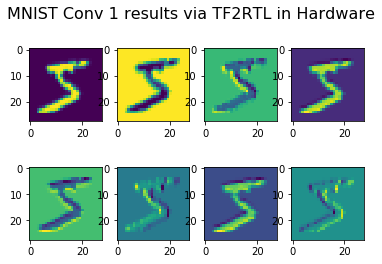

In [80]:
fig, axes = plt.subplots(2, 4)
fig.suptitle("MNIST Conv 1 results via TF2RTL in Hardware", fontsize=16)
_ = [axes[i//4][i%4].imshow(tf2rtl_output[i]) for i in range(8)]

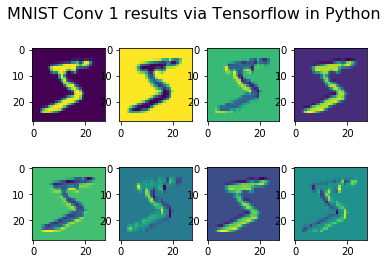

In [71]:
fig, axes = plt.subplots(2, 4)
fig.suptitle("MNIST Conv 1 results via Tensorflow in Python", fontsize=16)
_ = [axes[i//4][i%4].imshow(output[i]) for i in range(8)]

In [81]:
mean_err = np.mean(np.abs(output - tf2rtl_output))

In [82]:
mean_err / np.mean(np.abs(output))

0.00014053705183746695

In [74]:
tf2rtl_output

array([[[ 0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188],
        [ 0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188],
        [ 0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188,  0.01367188,  0.01367188,  0.01367188,
          0.01367188, 

In [75]:
output

array([[[ 1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02],
        [ 1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.41221322e-02,  1.41221322e-02,  1.41221322e-02,
          1.4